In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import csv
from scipy import optimize
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


from numpy import linalg as LA
import scipy.sparse as sparse
from scipy.sparse import csc_matrix
from scipy.sparse import dia_matrix
import itertools
from itertools import combinations
import operator
from mpl_toolkits import mplot3d

from utils import *
import math

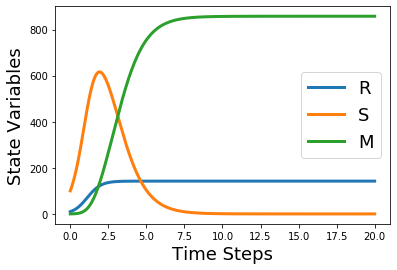

In [2]:
def RSM(t, pop):
#     a_r, a_s, a_m, K, e, f = 1.1, 2.0, 1.1, 10**3, 0.001, 0.001
    a_r, a_s, a_m, K, e, f = 2.5, 2.0, 2.5, 10**3, 0.001, 0.001
    # a_i is growth rate
    R, S, M = pop
    return np.array([a_r*R*(1-(R+S+M)/K),
            a_s*S*(1-(R+S+M)/K) - e*S*R - f*S*M,
            a_m*M*(1-(R+S+M)/K) + e*S*R + f*S*M])

tspan = np.linspace(0, 20, num=2001)
dt = 0.01
ini = [10, 100, 0]
sol = integrate.solve_ivp(RSM, [tspan[0], tspan[-1]], ini, method='RK45', t_eval=tspan)


plt.figure(figsize=(6,4))
plt.plot(sol.t, sol.y[0].T,linewidth=3, label='R')
plt.plot(sol.t, sol.y[1].T, linewidth=3,label='S')
plt.plot(sol.t, sol.y[2].T,linewidth=3, label='M')
plt.xlabel("Time Steps",fontsize=18)
plt.ylabel("State Variables",fontsize=18)
plt.legend()
plt.legend(fontsize=18)
plt.show()



In [4]:
dx = RSM(sol.t, sol.y)
theta, descr = lib_terms(sol.y,3,'RSM')
## theta and descr

L,E,N = evaluate_eucdist(theta,-10,1,30,dx.T)
print(L)
print(E)
print(N)

[1.00000000e-10 2.39502662e-10 5.73615251e-10 1.37382380e-09
 3.29034456e-09 7.88046282e-09 1.88739182e-08 4.52035366e-08
 1.08263673e-07 2.59294380e-07 6.21016942e-07 1.48735211e-06
 3.56224789e-06 8.53167852e-06 2.04335972e-05 4.89390092e-05
 1.17210230e-04 2.80721620e-04 6.72335754e-04 1.61026203e-03
 3.85662042e-03 9.23670857e-03 2.21221629e-02 5.29831691e-02
 1.26896100e-01 3.03919538e-01 7.27895384e-01 1.74332882e+00
 4.17531894e+00 1.00000000e+01]
[1.50758096e-03 1.92596410e-03 1.62944048e-03 1.62944048e-03
 2.71181144e-03 2.72890667e-03 3.15088407e-03 3.15088407e-03
 2.45815152e-03 2.45596411e-03 2.45596411e-03 2.45596411e-03
 2.45596411e-03 2.45596411e-03 2.45596411e-03 2.45596411e-03
 2.45596411e-03 2.45596411e-03 2.45596411e-03 3.05468748e+03
 1.18620362e+05 1.18620362e+05 1.18620362e+05 1.18620362e+05
 1.18620362e+05 1.18620362e+05 1.18620362e+05 1.18620362e+05
 9.92071541e+03 9.92071541e+03]
[25 24 23 23 21 20 18 18 15 13 13 13 13 13 13 13 13 13 13 11  3  3  3  3
  3  3  3

In [5]:
print(descr)

['1', '(0, 0, 1) RSM', '(0, 1, 0) RSM', '(1, 0, 0) RSM', '(0, 0, 2) RSM', '(0, 1, 1) RSM', '(0, 2, 0) RSM', '(1, 0, 1) RSM', '(1, 1, 0) RSM', '(2, 0, 0) RSM', '(0, 0, 3) RSM', '(0, 1, 2) RSM', '(0, 2, 1) RSM', '(0, 3, 0) RSM', '(1, 0, 2) RSM', '(1, 1, 1) RSM', '(1, 2, 0) RSM', '(2, 0, 1) RSM', '(2, 1, 0) RSM', '(3, 0, 0) RSM']


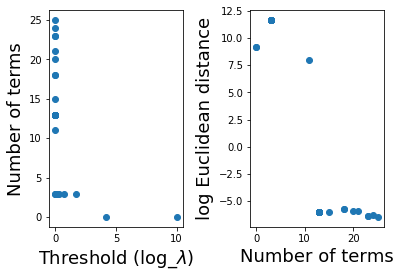

In [6]:
plt.subplot(1,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)",fontsize=18)
plt.ylabel("Number of terms",fontsize=18)
plt.subplot(1,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, np.log(E))
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("log Euclidean distance",fontsize=18)
plt.subplots_adjust(wspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

In [7]:
# Xi = sparsifyDynamics(theta, dx.T, 9.23670857e-03)
# Xi = sparsifyDynamics(theta, dx.T, 6.72335754e-04)
Xi = sparsifyDynamics(theta, dx.T, 8.85866790e-04)

Xi = np.around(Xi,decimals=4)
print(Xi)
# obtain Xi here by changing lambda

[[ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  2.5e+00]
 [ 0.0e+00  2.0e+00  0.0e+00]
 [ 2.5e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00 -2.5e-03]
 [ 0.0e+00 -3.0e-03 -1.5e-03]
 [ 0.0e+00 -2.0e-03  0.0e+00]
 [-2.5e-03  0.0e+00 -2.5e-03]
 [-2.5e-03 -3.0e-03  1.0e-03]
 [-2.5e-03  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]]


### Information Criteria

In [8]:
#AIC for RSM

L,AIC,AICc, BIC, N = evaluate_AIC(theta,-10,1,20,dx.T)
print(L)
print(AIC)
print(N)

[1.00000000e-10 3.79269019e-10 1.43844989e-09 5.45559478e-09
 2.06913808e-08 7.84759970e-08 2.97635144e-07 1.12883789e-06
 4.28133240e-06 1.62377674e-05 6.15848211e-05 2.33572147e-04
 8.85866790e-04 3.35981829e-03 1.27427499e-02 4.83293024e-02
 1.83298071e-01 6.95192796e-01 2.63665090e+00 1.00000000e+01]
[-343.85991652 -342.30530972 -342.30530972 -331.99202269 -329.11638209
 -334.08185045 -336.09965557 -336.09965557 -336.09965557 -336.09965557
 -336.09965557 -336.09965557 -336.09965557    5.75873082    5.75873082
    5.75873082    5.75873082    5.75873082  -49.86733162  -49.86733162]
[25 23 23 20 18 15 13 13 13 13 13 13 13  3  3  3  3  3  0  0]


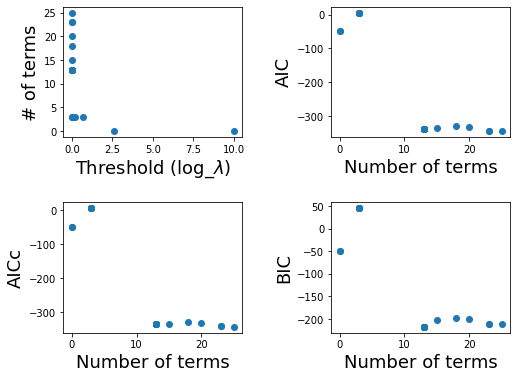

In [9]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)",fontsize=18)
plt.ylabel("# of terms",fontsize=18)
plt.subplot(2,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, AIC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("AIC",fontsize=18)
plt.subplot(2,2,3)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, AICc)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("AICc",fontsize=18)
plt.subplot(2,2,4)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, BIC)
plt.xlabel("Number of terms",fontsize=18)
plt.ylabel("BIC",fontsize=18)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

In [10]:
RSM_Xi = sparsifyDynamics(theta, dx.T, 8.85866790e-04)

# print(RSM_Xi)

m, n = RSM_Xi.shape
RSM_Xi_sf = [[] for _ in range(m)]

for i in range(m):
    for j in range(n):
        if abs(RSM_Xi[i, j]) < 1e-6:
            RSM_Xi_sf[i].append('0.0    ')
        else:
            RSM_Xi_sf[i].append('{:.1e}'.format(RSM_Xi[i, j]))

print(np.array(RSM_Xi_sf))

[['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '2.5e+00']
 ['0.0    ' '2.0e+00' '0.0    ']
 ['2.5e+00' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '-2.5e-03']
 ['0.0    ' '-3.0e-03' '-1.5e-03']
 ['0.0    ' '-2.0e-03' '0.0    ']
 ['-2.5e-03' '0.0    ' '-2.5e-03']
 ['-2.5e-03' '-3.0e-03' '1.0e-03']
 ['-2.5e-03' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']
 ['0.0    ' '0.0    ' '0.0    ']]
